In [19]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
import tensorflow as tf
import numpy as np

print("Keras:", keras.__version__)
print("TensorFlow:", tf.__version__)
print("Backend:", keras.config.backend())
	

Keras: 3.8.0
TensorFlow: 2.18.0
Backend: tensorflow


In [20]:
# 패션 MNIST 데이터 불러오기

import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0  # .reshape() method를 사용하여 차원 추가 
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42)


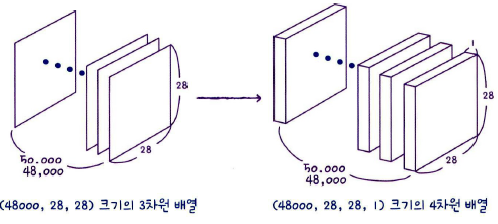

In [21]:
#합성곱 신경망 만들기 
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32,kernel_size=3, activation = 'relu', padding = 'same')) #32개의 필터 사용(도장이 32개, 크기는 3*3)

In [22]:
# 첫번째 합성곱 층
model.add(keras.layers.MaxPooling2D(2))  #(2,2) 풀링  --> Maxpooling 통과한 특성 맵의 크기 (14,14,32), 32개의 필터(도장개수)를 사욯해서 깊이는 32

In [23]:
# 두번재 합성곱

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',  # 필터의 개수(도장의 개수) 64개, 깊이가 64   --> (7,7,64)
                              padding= 'same'))
model.add(keras.layers.MaxPooling2D(2))

In [24]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4)) # 드롭아웃 층은 은닉층과 과대적합을 막아 성능 조금 개선
model.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

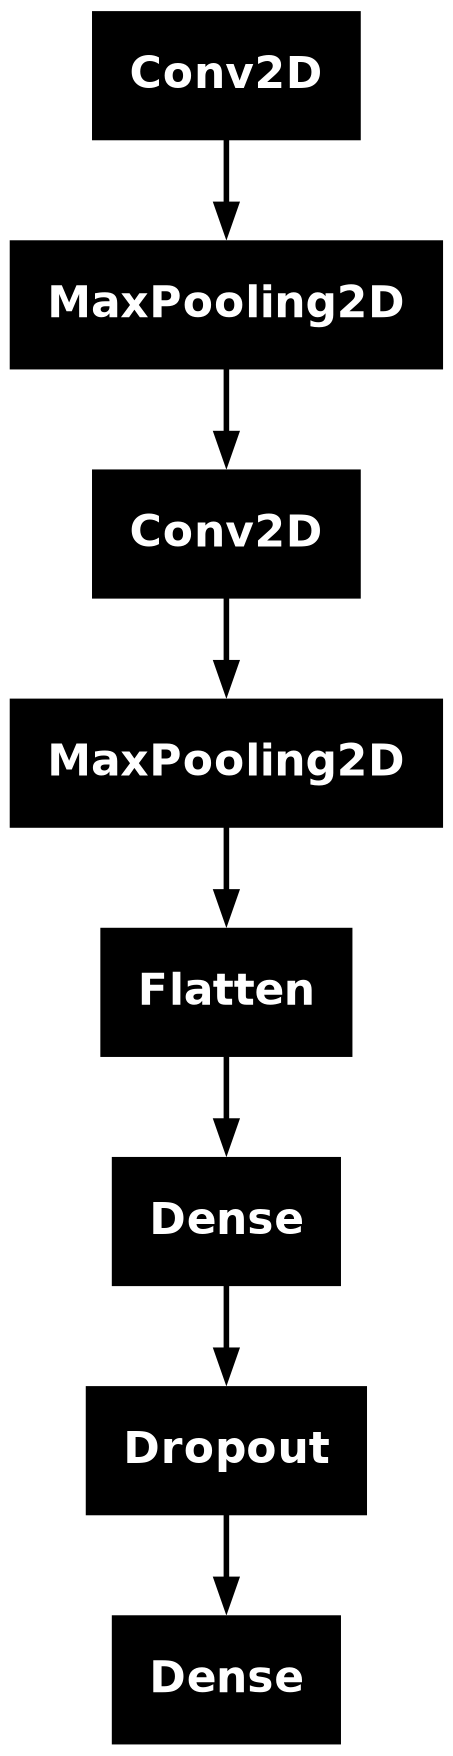

In [26]:
keras.utils.plot_model(model)

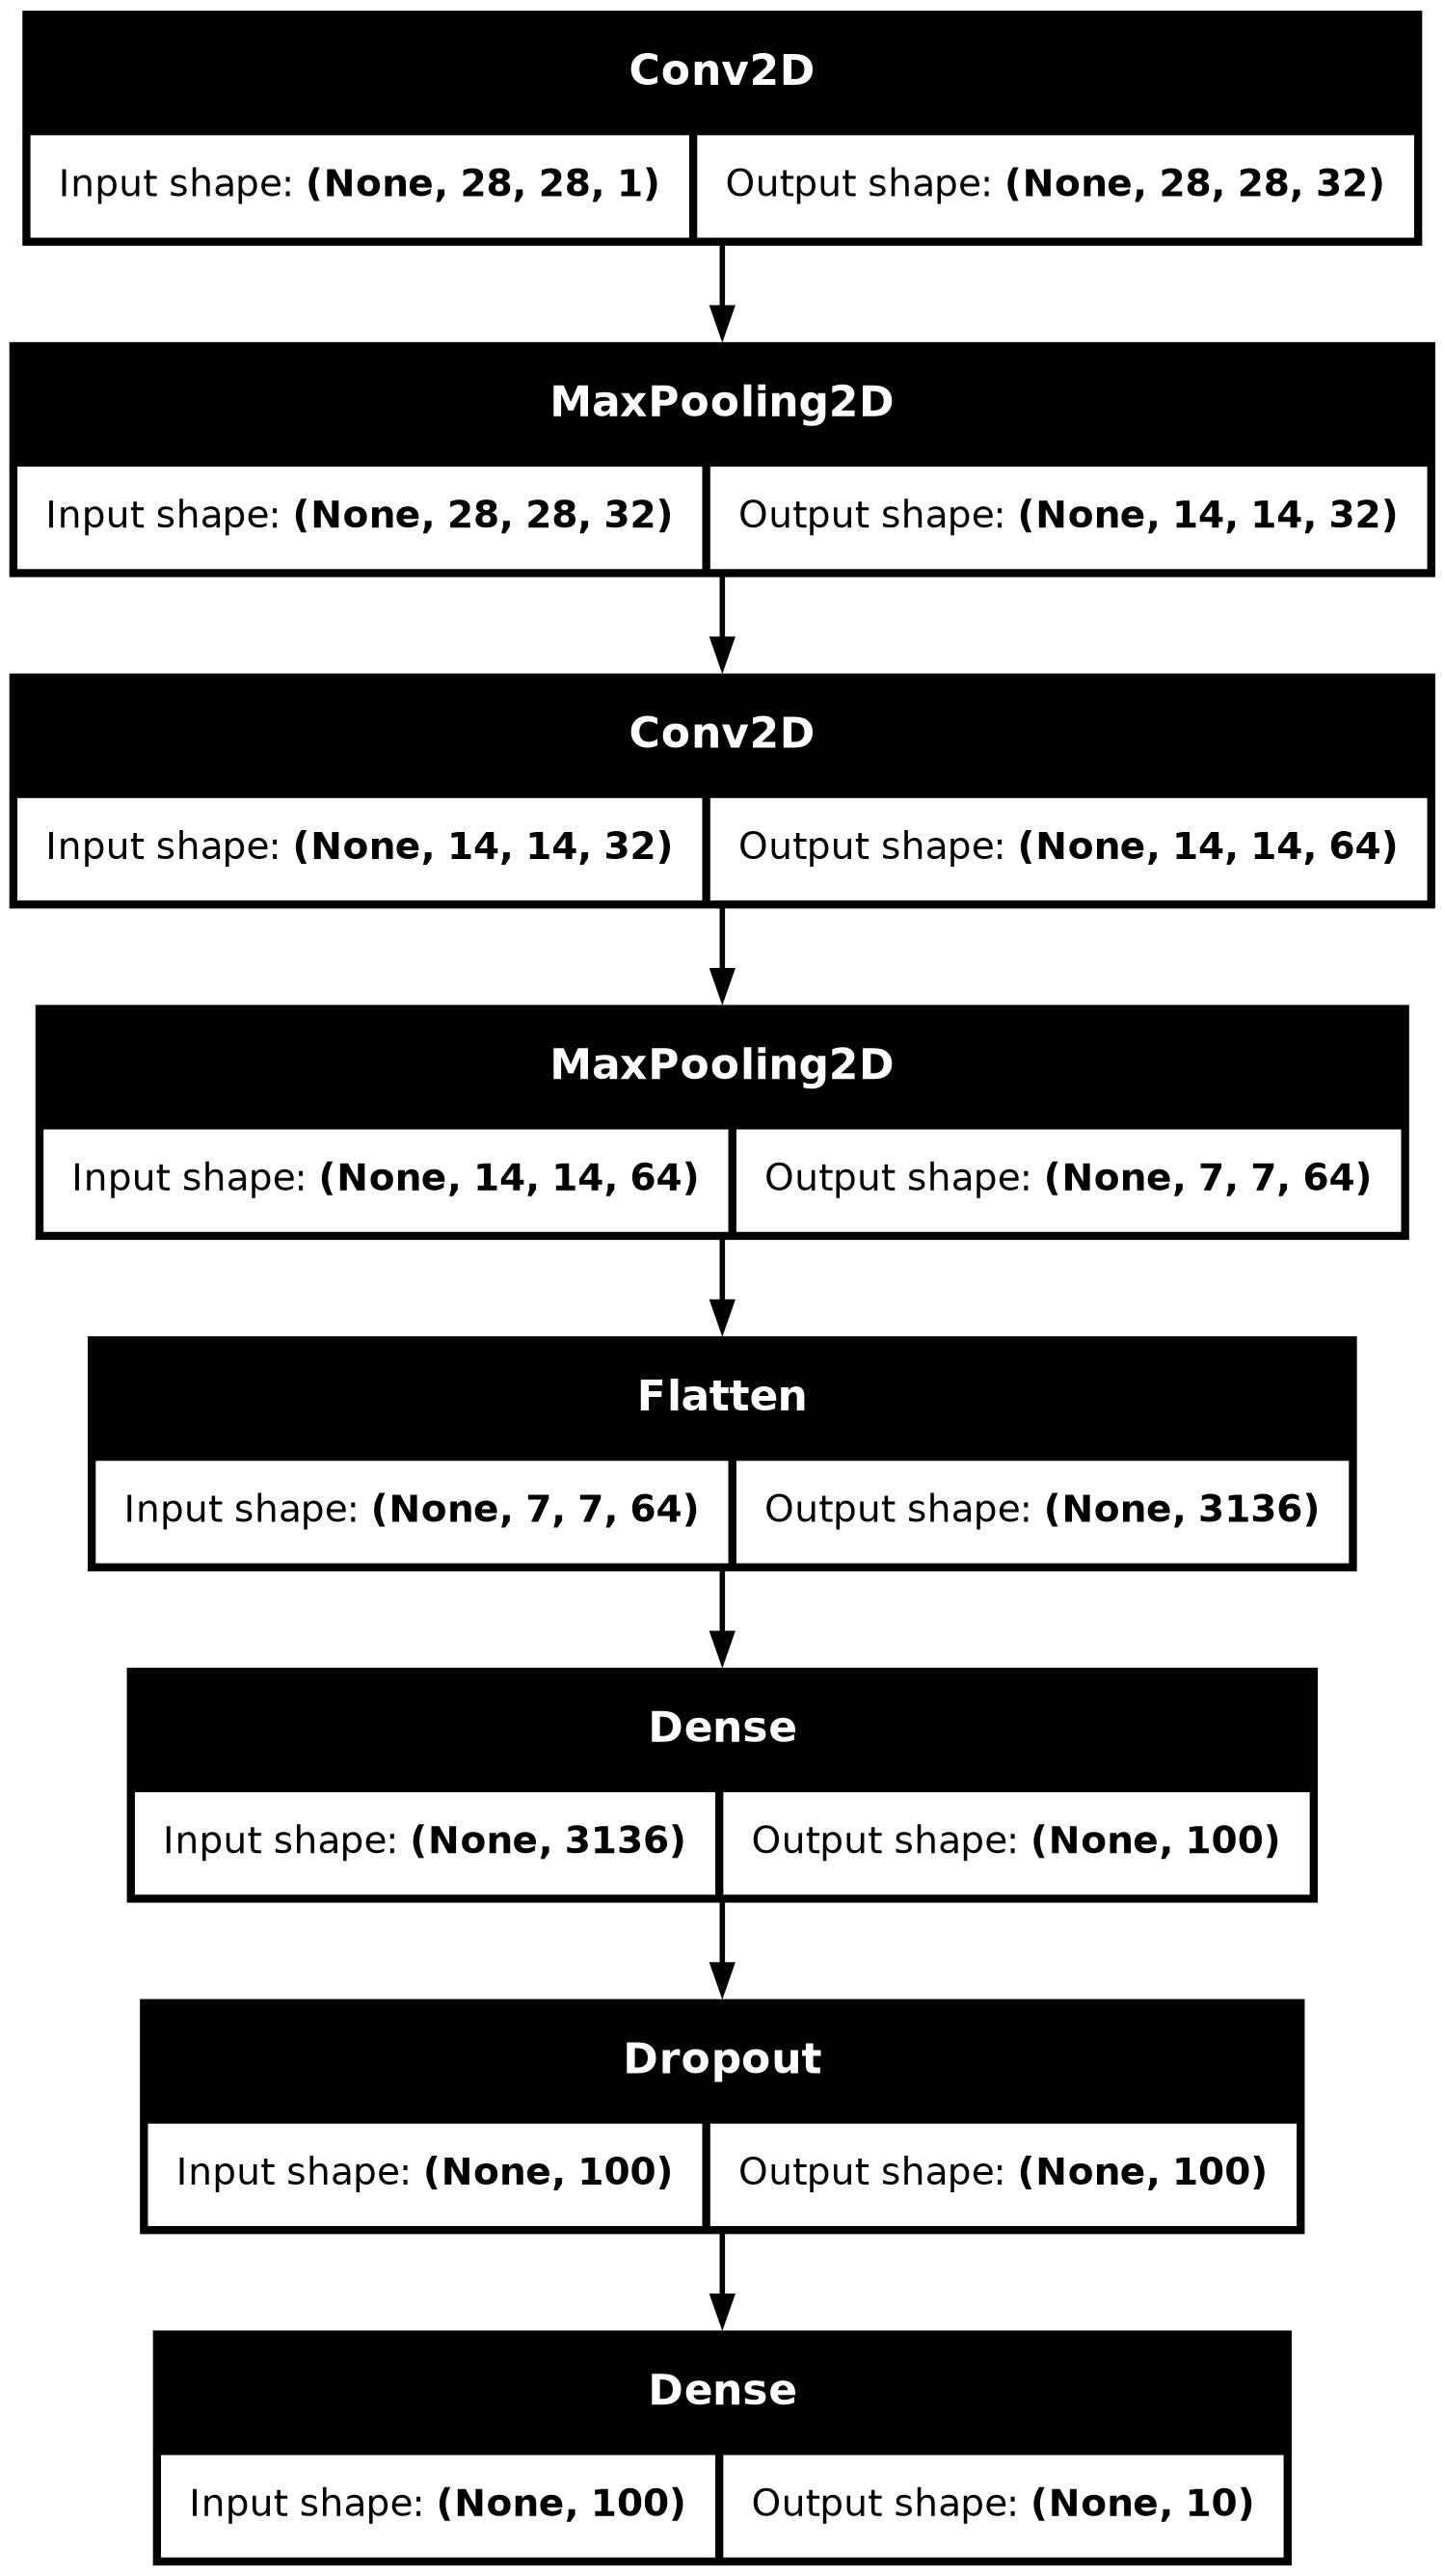

In [27]:
keras.utils.plot_model(model, show_shapes= True)

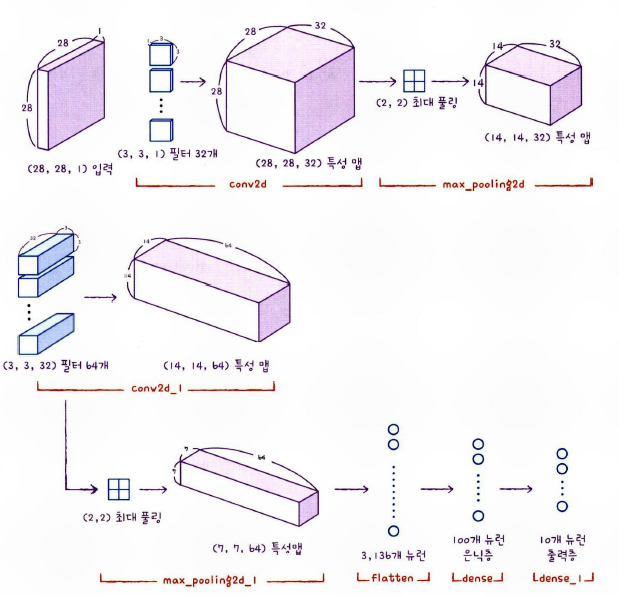

In [28]:
# 모델 컴파일 훈련
from lightgbm import early_stopping


model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
              metrics= ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7455 - loss: 0.7222 - val_accuracy: 0.8747 - val_loss: 0.3329
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8725 - loss: 0.3602 - val_accuracy: 0.8925 - val_loss: 0.2825
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8914 - loss: 0.3024 - val_accuracy: 0.9037 - val_loss: 0.2597
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9047 - loss: 0.2598 - val_accuracy: 0.9135 - val_loss: 0.2315
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9138 - loss: 0.2296 - val_accuracy: 0.9179 - val_loss: 0.2299
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9197 - loss: 0.2204 - val_accuracy: 0.9123 - val_loss: 0.2327
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9249 - loss: 0.2026 - val_accuracy: 0.9196 - val_loss: 0.2192
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9336 -

In [ ]:
'''
### error 수정 
### plt.show = () 오타로 plt.show가 함수가 아니라 튜플이 됨
import importlib   #파이썬 모듈 다시 불러오거나 조작 할수 있게 해주는 라이브러리(모듈 강제 초기화)
import matplotlib.pyplot as plt 
importlib.reload(plt) # plt 초기상태로 reload , 원래 상태로 리셋
'''


<module 'matplotlib.pyplot' from '/home/user/anaconda3/envs/ai-study/lib/python3.10/site-packages/matplotlib/pyplot.py'>

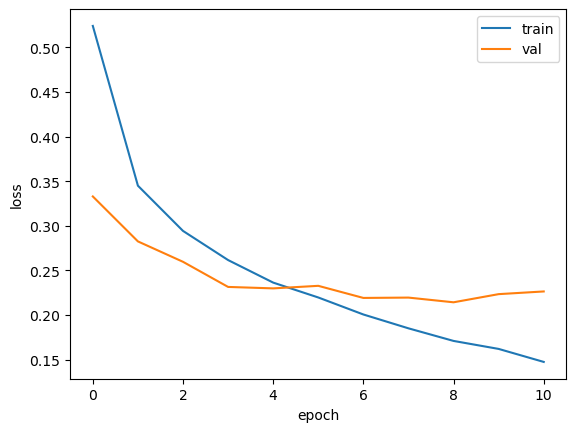

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [35]:
model.evaluate(val_scaled, val_target)  #세트에 대한 성능평가

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9263 - loss: 0.2135


[0.2143014669418335, 0.9269999861717224]

In [36]:
model= keras.models.load_model('best-cnn-model.keras')

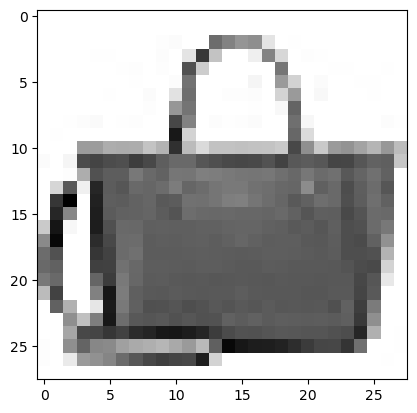

In [37]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [38]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[4.6124185e-21 1.5663876e-31 1.8407192e-24 7.5786650e-23 5.0895213e-19
  7.1350060e-20 2.5259397e-22 7.9937762e-22 1.0000000e+00 2.5669440e-20]]


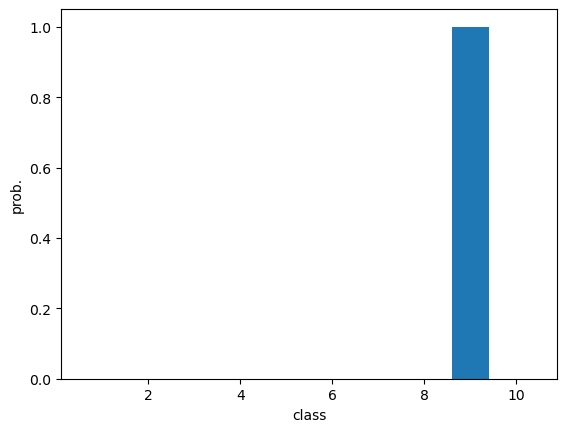

In [40]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()


In [41]:
classes = ['티셔츠','바지','스웨터','드레스','코드','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [42]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [43]:
# 테스트 세트로 성능 검증

test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [44]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9185 - loss: 0.2412


[0.23630991578102112, 0.9189000129699707]

In [69]:
# 파이토치로 합성곱 신경망 모델 훈련하기

from torchvision.datasets import FashionMNIST

fm_train = FashionMNIST(root='.', train=True, download=True)
fm_test = FashionMNIST(root=',', train=False, download=True)

train_input = fm_train.data
train_target = fm_train.targets
train_scaled = train_input.reshape(-1,1,28,28)/255.0

from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

import torch
import torch.nn as nn

#add.module로 층 하나씩 추가

model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(1,32,kernel_size=3, padding='same'))  #(이볅 채널 개수, 출력 채널 개수(필터개수),커널크기, 패딩종류)
model.add_module('relu', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(2))

model.add_module('conv2', nn.Conv2d(32,64,kernel_size=3, padding='same'))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(2))
model.add_module('flatten', nn.Flatten())


outputs = model(torch.ones(1,1,28,28))
print(outputs.shape)

model.add_module('dense1', nn.Linear(3136, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('dropout', nn.Dropout(0.3))
model.add_module('dense2', nn.Linear(100,10))

#####---모델구성완료


torch.Size([1, 3136])


In [ ]:
#####---모델 GPU로 전달

import torch 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

 
from torch.utils.data import TensorDataset, DataLoader #TensorDataset 클래스: 여러텐서를 결합하여 하나의 데이터셋으로 관리, DataLoader 클래스: TensorDataset으로 만든 데이터셋 배치 생성

# 1. Dataset / DataLoader 만들기
train_dataset = TensorDataset(train_scaled, train_target)
val_dataset   = TensorDataset(val_scaled, val_target)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)   # 훈련: 섞기
val_loader   = DataLoader(val_dataset,   batch_size=32, shuffle=False)  # 검증: 그대로

# 2. 기록용 리스트 + Early Stopping 설정
train_hist = []
val_hist   = []

patience = 2           # 성능 안 좋아지는 에포크 허용 횟수
best_loss = -1         # 아직 최선 없음 표시
early_stopping_counter = 0

# 3. 에포크 루프
epochs = 20
for epoch in range(epochs):
    # -----------------------
    # (1) 훈련 단계
    # -----------------------
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # -----------------------
    # (2) 검증 단계
    # -----------------------
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    # -----------------------
    # (3) 에포크별 손실 평균 + 기록
    # -----------------------
    train_loss = train_loss / len(train_loader)
    val_loss   = val_loss   / len(val_loader)

    train_hist.append(train_loss)
    val_hist.append(val_loss)

    print(f"에포크:{epoch+1:2d}  "
          f"훈련 손실:{train_loss:.4f}, 검증 손실:{val_loss:.4f}")

    # -----------------------
    # (4) Early Stopping 로직
    # -----------------------
    if best_loss == -1 or val_loss < best_loss:
        # 성능이 좋아진 경우 → 모델 저장 + 카운터 리셋
        best_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), "best_cnn_model.pt")
    else:
        # 성능이 좋아지지 않음 → 카운터 증가
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"{epoch+1}번째 에포크에서 조기 종료되었습니다.")
            break
        
        
    

에포크: 1  훈련 손실:0.0708, 검증 손실:0.4045
에포크: 2  훈련 손실:0.0636, 검증 손실:0.4040
에포크: 3  훈련 손실:0.0609, 검증 손실:0.4355
에포크: 4  훈련 손실:0.0607, 검증 손실:0.4163
4번째 에포크에서 조기 종료되었습니다.


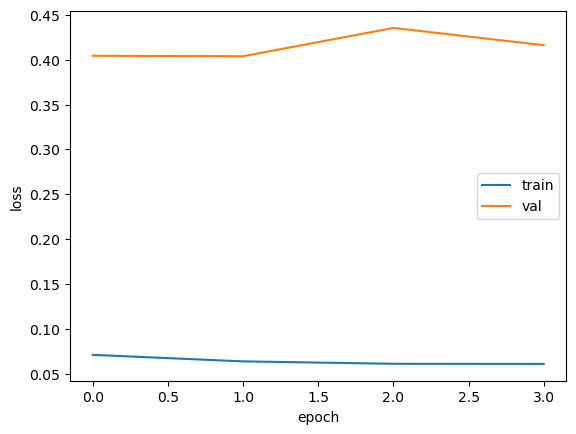

In [94]:
import matplotlib.pyplot as plt

plt.plot(train_hist, label='train')
plt.plot(val_hist, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [93]:
# ------------------------------
# (1) 저장된 best 모델 로드
# ------------------------------
model.load_state_dict(torch.load('best_cnn_model.pt', weights_only=True))
model.to(device)
model.eval()

# ------------------------------
# (2) 검증 데이터 정확도 계산
# ------------------------------
corrects = 0

with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)   # input 오타 수정
        outputs = model(inputs)
        predicts = torch.argmax(outputs, dim=1)
        corrects += (predicts == targets).sum().item()             # corrects → correct 수정

# 전체 데이터 중 몇 개 맞았는지
accuracy = correct / len(val_dataset)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.0000


In [95]:
test_scaled = fm_test.data.reshape(-1,1,28,28) / 255.0
test_target = fm_test.targets

test_dataset = TensorDataset(test_scaled, test_target)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [97]:
model.eval()
corrects = 0 
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicts = torch.argmax(outputs, 1)
        corrects += (predicts == targets).sum().item()
        
accuracy = corrects / len(test_dataset)
print(f"테스트 정확도: {accuracy:.4f}")

테스트 정확도: 0.9082
